# Web Scraping Sunstat statusinvest

Este notebook é parte das tarefas do curso de Data Science da [Awari](https://awari.com.br/). **O objetivo deste notebook é recuperar os dados fundamentalistas das empresas com ações na bolsa de valores do Brasil**.

Foram recuperados 576 ações.

In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from time import sleep
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r'/Users/leuzinger/Dropbox/Data Science/Awari/Projeto Final/statusinvest-acoes.csv',sep=';')
df.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,"10,45",NaN,"-18,84","1,03","0,48","21,41","2,55","-6,71","49,48",...,"0,47","0,52","0,38","5,83",NaN,"16.166.248,62","10,15","-0,55","0,02","1.232.611.142,72"
1,ABCB4,"15,09","6,16","9,39","0,78","0,07","13,55","8,97","8,56","8,96",...,"0,09","0,91","0,09","1,17","-2,60","12.260.473,74","19,43","1,61","-0,45","3.411.699.880,62"
2,ABEV3,"17,07","2,87","20,81","3,28","2,01","52,95","27,05","20,69","15,92",...,"0,61","0,37","0,47","4,56","-1,85","516.528.139,00","5,21","0,82","0,79","268.706.640.178,65"
3,ADHM3,"1,56",NaN,"-4,09","-1,29","105,12","100,00","-13.548,48","-18.860,61","-5,69",...,"-81,72","82,72","0,14",NaN,NaN,"94.201,44","-1,21","-0,38","-0,58","25.439.770,20"
4,AERI3,"9,29",NaN,"59,50","7,19","2,56","10,82","8,71","4,61","31,49",...,"0,36","0,64","0,93",NaN,NaN,"40.789.510,62","1,29","0,16","2,28","7.110.460.871,68"


In [47]:
def get_data(alvo):
    #abrir a página da Status invest
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.implicitly_wait(10)
    driver.get("https://statusinvest.com.br/acoes")
    
    #abrir pesquisa
    botão_pesquisa = driver.find_elements_by_xpath('//*[@id="main-nav-nav"]/div/div/div/ul/li[2]/a/i')[0]
    botão_pesquisa.click()
    
    #procurar ação/empresa
    caixa_pesquisa = driver.find_elements_by_xpath('//*[@id="main-search"]/div[1]/span[1]/input[2]')[0]
    caixa_pesquisa.send_keys(alvo)
    sleep(1)
    
    resultado_final = pd.DataFrame(columns=['ATUAL','2020','2019','2018','2017','2016','2015','2014','2013','2012'])
    
    try:
        resultado_pesquisa = driver.find_elements_by_xpath('//*[@id="main-search"]/div[2]/div/div/a')[0]
        resultado_pesquisa.click()
        
        
        #abrir hisórico da empresa
        botão_histórico = driver.find_elements_by_xpath('//*[@id="indicators-section"]/div[1]/div/button[2]')[0]
        botão_histórico.click()
        
        #coletar e salvar dados da empresa
        for n in range(2,7):
            índices = driver.find_elements_by_xpath(f'//*[@id="indicators-section"]/div[3]/div[{n}]/div/div[1]')[0]
            todos_índices = índices.find_elements_by_tag_name("h3")
            
            linhas = []
            for i in range(len(todos_índices)):
                linhas.append(todos_índices[i].text)
            
            tabela = driver.find_element_by_xpath(f'//*[@id="indicators-section"]/div[3]/div[{n}]/div/div[2]')
            todos_elementos = tabela.find_elements_by_css_selector("*")
            
            colunas = todos_elementos[1].text.split('\n')
            resultado = pd.DataFrame(index = linhas,columns=colunas)
            dados = todos_elementos[0].text.split('\n')
        
            for i in range(len(linhas)):
                for k in range(len(colunas)):
                    m = (i+1)*len(colunas)+k
                    resultado.iloc[i,k] = todos_elementos[0].text.split('\n')[m]
            frames=[resultado_final,resultado]
            resultado_final = pd.concat(frames)
    except:
        pass
    driver.quit()

    return resultado_final

In [48]:
get_data('EQTL3')



INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


,ATUAL,2020,2019,2018,2017,2016,2015,2014,2013,2012
D.Y,"3,07%","1,38%","4,17%","1,62%","0,88%","1,71%","3,45%","1,41%","1,47%","2,46%"
P/L,"7,93","7,87","1,90","16,14","13,08","15,17","8,40","8,62","66,93","15,06"
PEG RATIO,"0,75",-,"0,01","-2,03","0,33","-1,27","0,31","0,01","-1,35","-1,02"
P/VP,"2,25","2,24","0,57","2,65","2,73","2,68","1,95","1,94","1,95","0,95"
EV/EBITDA,"5,88","6,15","3,15",-,-,-,"7,28","6,33","11,47","6,81"
EV/EBIT,"6,63","7,02","3,62","10,40","11,23","10,67","10,16","8,29","21,51","8,69"
P/EBITDA,"4,18","4,28","0,93",-,-,-,"6,00","4,40","8,49","3,99"
P/EBIT,"4,72","4,89","1,07","7,13","9,25","9,16","8,37","5,76","15,92","5,09"
VPA,"10,46","10,35","40,20","28,16","24,09","20,26","17,53","14,29","11,86","19,74"
P/ATIVO,"0,55","0,53","0,12","0,58","0,75","0,76","0,54","0,49","0,50","0,22"


In [5]:
resultado_final=[]
for i in df['TICKER']:
    resultado = get_data(i)
    resultado_final.append(resultado)
    print(i,'OK')



INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AALR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ABCB4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ABEV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ADHM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AERI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AESB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AFLT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AGRO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AHEB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AHEB5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AHEB6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ALLD3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ALPA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ALPA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ALPK3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ALSO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ALUP11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ALUP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ALUP4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======


AMAR3 OK


Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AMBP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ANIM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


APER3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


APTI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


APTI4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ARZZ3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ASAI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ATMP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ATOM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AURA33 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AVLL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AZEV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AZEV4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


AZUL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


B3SA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BAHI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BALM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BALM4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BAUH4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BAZA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BBAS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BBDC3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BBDC4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BBML3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BBRK3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BBSE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BDLL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BDLL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BEEF3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BEES3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BEES4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BFRE11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BFRE12 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BGIP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BGIP4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BIDI11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BIDI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BIDI4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BIOM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BKBR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BLAU3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BMEB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BMEB4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BMGB4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BMIN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BMIN4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BMKS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BMOB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BNBR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BOAS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BOBR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BOBR4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BPAC11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BPAC3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BPAC5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BPAN4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BPAR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BPAT33 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BPHA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRAP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRAP4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRBI11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRDT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRFS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRGE11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRGE12 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRGE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRGE5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRGE6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRGE7 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRGE8 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRIV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRIV4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRKM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRKM5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRKM6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRML3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRPR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRQB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRSR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRSR5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BRSR6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BSEV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BSLI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BSLI4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BTOW3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


BTTL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CALI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CALI4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CAMB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CAMB4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CAML3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CARD3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CASH3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CASN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CASN4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CATA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CATA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CBAV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CBEE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CCPR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CCRO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CCXC3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEAB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEBR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEBR5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEBR6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEDO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEDO4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEEB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEEB5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEEB6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEED3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEED4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEGR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEPE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CEPE5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515


CEPE6 OK


Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CESP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CESP5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CESP6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CGAS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CGAS5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CGRA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CGRA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CIEL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CLSC3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CLSC4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CMIG3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CMIG4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CMIN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CMSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CMSA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CNSY3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


COCE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


COCE5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


COCE6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


COGN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CORR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CORR4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CPFE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CPLE11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CPLE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CPLE5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CPLE6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CPRE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CRDE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CREM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CRFB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CRIV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CRIV4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CRPG3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CRPG5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CRPG6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CSAB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CSAB4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CSAN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CSED3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CSMG3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CSNA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CSRN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CSRN5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CSRN6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CTCA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CTKA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CTKA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CTNM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CTNM4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CTSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CTSA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CTSA8 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CURY3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CVCB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CXSE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


CYRE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DASA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DEXP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DEXP4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DIRR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DMMO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DMVF3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DOHL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DOHL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DOTZ3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DTCY3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DTCY4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


DTEX3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EALT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EALT4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ECOR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ECPR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ECPR4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EEEL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EEEL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EGIE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EKTR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EKTR4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ELEK3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ELEK4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ELET3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ELET5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ELET6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ELMD3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ELPL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EMAE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EMAE4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EMBR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENAT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENBR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENEV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENGI11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENGI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENGI4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENJU3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENMA3B OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENMA6B OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENMT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ENMT4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EPAR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EQPA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EQPA5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EQPA6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EQPA7 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EQTL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ESPA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ESTR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ESTR4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ETER3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EUCA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EUCA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EVEN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


EZTC3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FBMC3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FBMC4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FESA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FESA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FHER3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FIGE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FIGE4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FLEX3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FLRY3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FNCN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FRAS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FRIO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FRTA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


FTRT3B OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


G2DI33 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


GBIO33 OK




INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GEPA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GEPA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GFSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GGBR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GGBR4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GGPS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GMAT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GNDI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GOAU3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GOAU4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GOLL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GPAR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GPIV33 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GRND3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GSHP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


GUAR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HAGA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HAGA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HAPV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HBOR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


HBRE3 OK


INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HBSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HBTS5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HETA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HETA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HGTX3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HOOT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HOOT4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


HYPE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


IDVL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


IDVL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


IFCM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


IGBR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


IGSN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


IGTA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


INEP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


INEP4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


INNT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


INTB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


IRBR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ITEC3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ITSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ITSA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ITUB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ITUB4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


JALL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


JBDU3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


JBDU4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


JBSS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


JFEN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


JHSF3 OK




INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


JOPA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


JOPA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


JPSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


JSLG3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


KEPL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


KLBN11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


KLBN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


KLBN4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LAME3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LAME4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LAVV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LCAM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LEVE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LHER3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


LHER4 OK


INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LIGT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LINX3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LIPR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LJQQ3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LLIS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LOGG3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LOGN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LPSB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LREN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LTEL3B OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LUPA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LUXM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LUXM4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


LWSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MAPT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MAPT4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MATD3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MBLY3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MDIA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MDNE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MEAL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MELK3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MERC3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MERC4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MGEL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MGEL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MGLU3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MILS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MMXM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MNDL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MNPR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MOAR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MODL11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MODL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MODL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MOSI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


MOVI3 OK




INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MRFG3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MRSA3B OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MRSA5B OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MRSA6B OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MRVE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MSPA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======


MSPA4 OK


Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MSRO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======


MTIG3 OK


Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======


MTIG4 OK


Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MTRE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MTSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MTSA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MULT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MWET3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MWET4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


MYPK3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NAFG3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NAFG4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NEMO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NEMO5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NEMO6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NEOE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NGRD3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NINJ3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NORD3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NRTQ3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NTCO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


NUTR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ODER4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ODPV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


OFSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======


OGXP3 OK


Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


OIBR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


OIBR4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


OMGE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


OPCT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ORVR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


OSXB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PARD3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PATI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PATI4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======


PCAR3 OK


Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PCAR4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PDGR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PDTC3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PEAB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PEAB4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PETR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PETR4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PETZ3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PFRM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PGMN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PINE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PINE4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PLAS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PLPL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PMAM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PNVL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PNVL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


POMO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


POMO4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


POSI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


POWE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PPAR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PPLA11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PRIO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PRNR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PSSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PTBL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PTCA11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PTCA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PTNT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


PTNT4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


QUAL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


QUSW3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


QVQP3B OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RADL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RAIL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RANI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RANI4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RAPT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RAPT4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RCSL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RCSL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RDNI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RDOR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RECV3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


REDE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RENT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RLOG3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RNEW11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RNEW3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RNEW4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


ROMI3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RPAD3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RPAD5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RPAD6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RPMG3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RRRP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RSID3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RSUL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


RSUL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SANB11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SANB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SANB4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SAPR11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SAPR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SAPR4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SBFG3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SBSP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SCAR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SEDU3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SEER3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SEQL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SGPS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SHOW3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SHUL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SHUL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SIMH3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SLCE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SLED3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SLED4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SMFT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


SMLS3 OK


INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SMTO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SNSY3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SNSY5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SNSY6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SOJA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SOMA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SOND3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SOND5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SOND6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SPRT3B OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SQIA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


STBP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


STKF3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


STTR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SULA11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SULA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SULA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


SUZB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TAEE11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TAEE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TAEE4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TASA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TASA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TCNO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TCNO4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TCSA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TECN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TEKA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TEKA4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TELB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TELB4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TEND3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TESA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TFCO4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TGMA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TIET11 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TIET3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TIET4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TIMS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TKNO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TKNO4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TOTS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TOYB3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TOYB4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TPIS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TRIS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TRPL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TRPL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TTEN3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TUPY3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TXRX3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


TXRX4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


UCAS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


UGPA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


UNIP3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


UNIP5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


UNIP6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


USIM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


USIM5 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


USIM6 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VALE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VAMO3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VIVA3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VIVR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VIVT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VIVT4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VLID3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VSPT3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VSPT4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VULC3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


VVAR3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


WEGE3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


WEST3 OK


INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


WHRL3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


WHRL4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


WIZS3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


WLMM3 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


WLMM4 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 92.0.4515
INFO:WDM:Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
INFO:WDM:Get LATEST driver version for 92.0.4515


WSON33 OK


Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache
INFO:WDM:Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/92.0.4515.107/chromedriver] found in cache


YDUQ3 OK


-----

### Salvando dados em um arquivo csv

In [20]:
matriz = pd.DataFrame(columns=resultado_final[0].columns)

for i in range(len(resultado_final)):
    matriz = matriz.append(resultado_final[i])

matriz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16072 entries, D.Y to GIRO ATIVOS
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ATUAL   16072 non-null  object
 1   2020    15568 non-null  object
 2   2019    15232 non-null  object
 3   2018    14476 non-null  object
 4   2017    14280 non-null  object
 5   2016    13804 non-null  object
 6   2015    13650 non-null  object
 7   2014    13384 non-null  object
 8   2013    13034 non-null  object
 9   2012    12698 non-null  object
dtypes: object(10)
memory usage: 1.3+ MB


In [21]:
matriz.to_csv(r'/Users/leuzinger/Dropbox/Data Science/Awari/Projeto Final/dados_empresas.csv',index=False)

-------

### Variáveis que serão utilizadas na clusterização:

* Valuation: Dividend Yiled e P/L
* Endividamento: Dívida líquida/PL
* Rentabilidade ROE e ROIC
* Eficiência: Margem Bruta, Margem EBITDA, Margem EBIT, e Margem Líquida, 
* Crescimento: Lucro e Receita


In [455]:
matriz_cluster = pd.DataFrame(index=df['TICKER'])

for ano in resultado_final[0].columns:
    matriz_cluster2 = pd.DataFrame(index=df['TICKER'],columns=[f'DY_{ano}',f'P/L_{ano}',f'Div_liq/PL_{ano}',
                                                               f'ROE_{ano}',f'ROIC_{ano}',f'M_bruta_{ano}',
                                                               f'M_EBTIDA_{ano}',f'M_EBIT_{ano}',
                                                               f'M_liquida_{ano}'])

    for i in range(len(resultado_final)):
        if len(resultado_final[i]) >0:
            resultado_cluster = resultado_final[i][ano][['D.Y', 'P/L','DÍV. LÍQUIDA/PL',
                                                             'ROE','ROIC','M. BRUTA', 'M. EBITDA', 'M. EBIT', 
                                                             'M. LÍQUIDA']].replace('-',np.nan).replace('-%',np.nan)
            for k in range(len(matriz_cluster2.columns)):
                if pd.isna(resultado_cluster[k]) == False:
                    if '%' in resultado_cluster[k]:
                        matriz_cluster2.iloc[i,k] = float(resultado_cluster[k].strip('%').replace('.','').replace(',','.'))/100
                    else:
                        matriz_cluster2.iloc[i,k] = float(resultado_cluster[k].replace('.','').replace(',','.'))
                else:
                    pass
        else:
            pass
    matriz_cluster = pd.concat([matriz_cluster,matriz_cluster2],axis=1)

In [456]:
matriz_cluster.head()

,DY_ATUAL,P/L_ATUAL,Div_liq/PL_ATUAL,ROE_ATUAL,ROIC_ATUAL,M_bruta_ATUAL,M_EBTIDA_ATUAL,M_EBIT_ATUAL,M_liquida_ATUAL,DY_2020,...,M_liquida_2013,DY_2012,P/L_2012,Div_liq/PL_2012,ROE_2012,ROIC_2012,M_bruta_2012,M_EBTIDA_2012,M_EBIT_2012,M_liquida_2012
TICKER,,,,,,,,,,,,,,,,,,,,,
AALR3,NaN,-18.53,0.47,-0.0546,0.002,0.2141,0.1487,0.0255,-0.0671,0.0079,...,0.1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABCB4,0.0598,7.97,NaN,0.0987,NaN,0.6472,NaN,0.5116,0.289,0.0101,...,0.1578,0.0234,7.95,NaN,0.1388,NaN,0.2943,NaN,0.212,0.1639
ABEV3,0.0295,17.95,-0.15,0.1847,0.1969,0.5259,0.3628,0.2838,0.2191,0.0264,...,0.2725,NaN,NaN,-0.17,0.1698,0.2799,0.6755,0.4229,0.4229,0.1963
ADHM3,NaN,-4.09,NaN,-0.3147,0.2261,1.0,NaN,-135.4848,-188.6061,NaN,...,NaN,NaN,NaN,NaN,-1.3436,1.1512,NaN,NaN,NaN,NaN
AERI3,NaN,52.39,0.66,0.1209,0.0887,0.1082,0.0973,0.0871,0.0461,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [452]:
matriz_cluster.shape

(576, 90)

In [453]:
matriz_cluster.isnull().sum().sum()/(5.76*90)

26.346450617283953

In [459]:
matriz_cluster.drop(columns=['DY_ATUAL','DY_2020','DY_2019','DY_2018','DY_2017','DY_2016',
                             'DY_2015','DY_2014','DY_2013','DY_2012','M_EBTIDA_ATUAL','M_EBTIDA_2020',
                             'M_EBTIDA_2019','M_EBTIDA_2018','M_EBTIDA_2017','M_EBTIDA_2016','M_EBTIDA_2015',
                             'M_EBTIDA_2014','M_EBTIDA_2013','M_EBTIDA_2012']).isnull().sum().sum()/(5.76*90)

14.074074074074074

In [457]:
matriz_cluster_ = pd.DataFrame(index=df['TICKER'])

for ano in ['ATUAL', '2020', '2019', '2018', '2017', '2016']:
    matriz_cluster2_ = pd.DataFrame(index=df['TICKER'],columns=[f'P/L_{ano}',f'Div_liq/PL_{ano}',
                                                               f'ROE_{ano}',f'ROIC_{ano}',f'M_bruta_{ano}',
                                                               f'M_EBIT_{ano}',
                                                               f'M_liquida_{ano}'])

    for i in range(len(resultado_final)):
        if len(resultado_final[i]) >0:
            resultado_cluster_ = resultado_final[i][ano][['P/L','DÍV. LÍQUIDA/PL',
                                                             'ROE','ROIC','M. BRUTA', 'M. EBIT', 
                                                             'M. LÍQUIDA']].replace('-',np.nan).replace('-%',np.nan)
            for k in range(len(matriz_cluster2_.columns)):
                if pd.isna(resultado_cluster_[k]) == False:
                    if '%' in resultado_cluster_[k]:
                        matriz_cluster2_.iloc[i,k] = float(resultado_cluster_[k].strip('%').replace('.','').replace(',','.'))/100
                    else:
                        matriz_cluster2_.iloc[i,k] = float(resultado_cluster_[k].replace('.','').replace(',','.'))
                else:
                    pass
        else:
            pass
    matriz_cluster_ = pd.concat([matriz_cluster_,matriz_cluster2_],axis=1)

In [458]:
matriz_cluster_.isnull().sum().sum()/(5.76*42)

13.678075396825397

In [460]:
matriz_cluster_.head()

,P/L_ATUAL,Div_liq/PL_ATUAL,ROE_ATUAL,ROIC_ATUAL,M_bruta_ATUAL,M_EBIT_ATUAL,M_liquida_ATUAL,P/L_2020,Div_liq/PL_2020,ROE_2020,...,M_bruta_2017,M_EBIT_2017,M_liquida_2017,P/L_2016,Div_liq/PL_2016,ROE_2016,ROIC_2016,M_bruta_2016,M_EBIT_2016,M_liquida_2016
TICKER,,,,,,,,,,,,,,,,,,,,,
AALR3,-18.53,0.47,-0.0546,0.002,0.2141,0.0255,-0.0671,-13.48,0.47,-0.0818,...,0.2981,0.0653,0.0062,NaN,0.26,0.0126,0.0552,0.3788,0.1057,0.0155
ABCB4,7.97,NaN,0.0987,NaN,0.6472,0.5116,0.289,10.16,NaN,0.0787,...,0.2304,0.2098,0.1982,6.19,NaN,0.1308,NaN,0.1821,0.2882,0.1948
ABEV3,17.95,-0.15,0.1847,0.1969,0.5259,0.2838,0.2191,21.64,-0.19,0.1542,...,0.6236,0.3455,0.1518,20.54,-0.06,0.2799,0.3225,0.6343,0.375,0.2751
ADHM3,-4.09,NaN,-0.3147,0.2261,1.0,-135.4848,-188.6061,-4.09,NaN,-0.3147,...,1.0,-265.9444,-300.6111,NaN,NaN,-0.4293,2.6382,NaN,NaN,NaN
AERI3,52.39,0.66,0.1209,0.0887,0.1082,0.0871,0.0461,67.69,0.47,0.1172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [467]:
matriz_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, AALR3 to YDUQ3
Data columns (total 90 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DY_ATUAL          315 non-null    object
 1   P/L_ATUAL         573 non-null    object
 2   Div_liq/PL_ATUAL  444 non-null    object
 3   ROE_ATUAL         573 non-null    object
 4   ROIC_ATUAL        518 non-null    object
 5   M_bruta_ATUAL     548 non-null    object
 6   M_EBTIDA_ATUAL    396 non-null    object
 7   M_EBIT_ATUAL      548 non-null    object
 8   M_liquida_ATUAL   548 non-null    object
 9   DY_2020           272 non-null    object
 10  P/L_2020          454 non-null    object
 11  Div_liq/PL_2020   440 non-null    object
 12  ROE_2020          572 non-null    object
 13  ROIC_2020         519 non-null    object
 14  M_bruta_2020      547 non-null    object
 15  M_EBTIDA_2020     463 non-null    object
 16  M_EBIT_2020       547 non-null    object
 17  M_liquida_2020 

In [475]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

matriz_cluster = matriz_cluster.astype(float)
imputer = SimpleImputer(strategy='mean')
matriz_cluster_im = imputer.fit_transform(matriz_cluster)
scaler = MinMaxScaler()
matriz_cluster_imsc = scaler.fit_transform(matriz_cluster_im)

In [480]:
matriz_cluster_imsc

array([[0.09256683, 0.17385095, 0.07580679, ..., 0.95747607, 0.10249786,
        0.07454769],
       [0.1162836 , 0.17531443, 0.08103322, ..., 0.95747607, 0.09661803,
        0.06831911],
       [0.05726529, 0.17586558, 0.07392453, ..., 0.96825095, 0.09695693,
        0.0683727 ],
       ...,
       [0.02941176, 0.17591141, 0.07368165, ..., 0.96200806, 0.09639419,
        0.0681185 ],
       [0.14978574, 0.17631953, 0.07708188, ..., 0.96343953, 0.09651728,
        0.06817639],
       [0.0368134 , 0.15895995, 0.07732475, ..., 0.96347295, 0.09645011,
        0.0681792 ]])

In [489]:
from sklearn.cluster import KMeans

inertias = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(matriz_cluster_imsc)
    inertias.append(kmeans.inertia_)
    print(f"k={k}, inertia={kmeans.inertia_}")
    #plot_silhouette(scaled_X, kmeans.labels_)

k=1, inertia=173.80531781850522
k=2, inertia=148.7833626697845
k=3, inertia=125.18850547874482
k=4, inertia=117.73229376305746
k=5, inertia=111.0431491542969
k=6, inertia=106.66562889179751
k=7, inertia=102.85783917537113
k=8, inertia=96.55297192730174
k=9, inertia=93.17323480984079


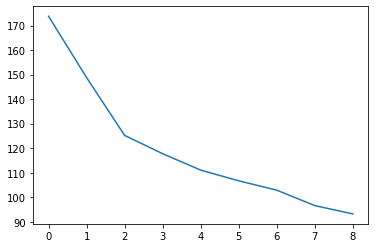

In [490]:
plt.plot(inertias)

In [492]:
from sklearn.cluster import KMeans

df_cluster = pd.DataFrame(matriz_cluster_imsc,index = matriz_cluster.index,columns = matriz_cluster.columns)
kmean = KMeans(n_clusters=5)
kmean.fit(df_cluster)

KMeans(n_clusters=5)

In [493]:
cluster_label = kmean.predict(df_cluster)
df_cluster["cluster_label"] = cluster_label
df_cluster.sort_values('cluster_label')

,DY_ATUAL,P/L_ATUAL,Div_liq/PL_ATUAL,ROE_ATUAL,ROIC_ATUAL,M_bruta_ATUAL,M_EBTIDA_ATUAL,M_EBIT_ATUAL,M_liquida_ATUAL,DY_2020,...,DY_2012,P/L_2012,Div_liq/PL_2012,ROE_2012,ROIC_2012,M_bruta_2012,M_EBTIDA_2012,M_EBIT_2012,M_liquida_2012,cluster_label
TICKER,,,,,,,,,,,,,,,,,,,,,
AALR3,0.092567,0.173851,0.075807,0.044680,0.037161,0.755624,0.670887,0.151498,0.151205,0.012300,...,0.012172,0.303024,0.030700,0.973578,0.275965,0.835712,0.957476,0.102498,0.074548,0
MYPK3,0.092567,0.174590,0.077598,0.044520,0.037111,0.738179,0.670525,0.151473,0.151221,0.066636,...,0.003008,0.301944,0.039462,0.978967,0.273727,0.793213,0.962370,0.096364,0.068070,0
MWET4,0.092567,0.174973,0.081033,0.044391,0.036194,0.743229,0.671638,0.151730,0.151411,0.056465,...,0.012172,0.298815,0.030700,0.959580,0.260530,0.804192,0.962374,0.096341,0.067919,0
MWET3,0.092567,0.175096,0.081033,0.044391,0.036194,0.743229,0.671638,0.151730,0.151411,0.056465,...,0.012172,0.303024,0.030700,0.959580,0.260530,0.804192,0.962374,0.096341,0.067919,0
MULT3,0.039151,0.175747,0.075351,0.045162,0.037462,0.825387,0.674620,0.152219,0.151919,0.030048,...,0.001753,0.301086,0.026788,0.979801,0.276185,0.941988,0.957476,0.097185,0.068718,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVLL3,0.092567,0.174777,0.080786,0.042230,0.036479,0.710939,0.666550,0.150654,0.150247,0.056465,...,0.012172,0.303024,0.030700,0.973578,0.275965,0.835712,0.957476,0.102498,0.074548,3
AZEV4,0.092567,0.175002,0.081033,0.039104,0.029531,0.080918,1.000000,0.216496,0.212629,0.056465,...,0.012172,0.299391,0.024795,0.982457,0.283909,0.793050,0.962084,0.096362,0.068115,3
RPAD3,0.092567,0.176111,0.074350,0.044887,0.037240,0.854171,0.669100,1.000000,1.000000,0.000156,...,0.012172,0.303024,0.011733,0.978988,0.275114,0.967482,0.957476,1.000000,1.000000,4


In [494]:
df_cluster['cluster_label'].value_counts()

0    559
1      9
3      3
4      3
2      2
Name: cluster_label, dtype: int64

In [495]:
df_cluster.groupby("cluster_label").mean()

,DY_ATUAL,P/L_ATUAL,Div_liq/PL_ATUAL,ROE_ATUAL,ROIC_ATUAL,M_bruta_ATUAL,M_EBTIDA_ATUAL,M_EBIT_ATUAL,M_liquida_ATUAL,DY_2020,...,M_liquida_2013,DY_2012,P/L_2012,Div_liq/PL_2012,ROE_2012,ROIC_2012,M_bruta_2012,M_EBTIDA_2012,M_EBIT_2012,M_liquida_2012
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,0.092520,0.179390,0.081230,0.047061,0.039443,0.773085,0.667748,0.150734,0.150556,0.056643,...,0.702235,0.012172,0.303052,0.031155,0.973436,0.275965,0.844464,0.957477,0.097787,0.069585
1,0.092043,0.175382,0.071040,0.044831,0.037176,0.261369,0.679506,0.153160,0.152260,0.054550,...,0.704184,0.012172,0.302594,0.010073,0.979337,0.271222,0.259799,0.957476,0.098859,0.077591
2,0.092567,0.194411,0.081033,0.044779,0.037016,0.750890,0.670576,0.151512,0.151271,0.056465,...,0.702611,0.012172,0.298878,0.030700,0.970463,0.290669,0.826243,0.952533,0.095451,0.066166
3,0.092567,0.174935,0.080951,0.040146,0.031847,0.290925,0.888850,0.194549,0.191835,0.056465,...,0.703413,0.012172,0.301813,0.026763,0.979497,0.281261,0.807271,0.960548,0.098407,0.070259
4,0.102810,0.176102,0.074350,0.044887,0.037240,0.854171,0.669100,1.000000,1.000000,0.029166,...,1.000000,0.012172,0.303024,0.011733,0.978988,0.275114,0.967482,0.957476,1.000000,1.000000
